In [65]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score


load data

In [23]:
df=pd.read_csv('Mall_Customers.csv')
df = df.drop('CustomerID', axis=1)
df.columns = ['Gender', 'Age', 'AnnualIncome', 'SpendingScore']

In [24]:
df.head()

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


data check

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [12]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [13]:
df.shape

(200, 4)

EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

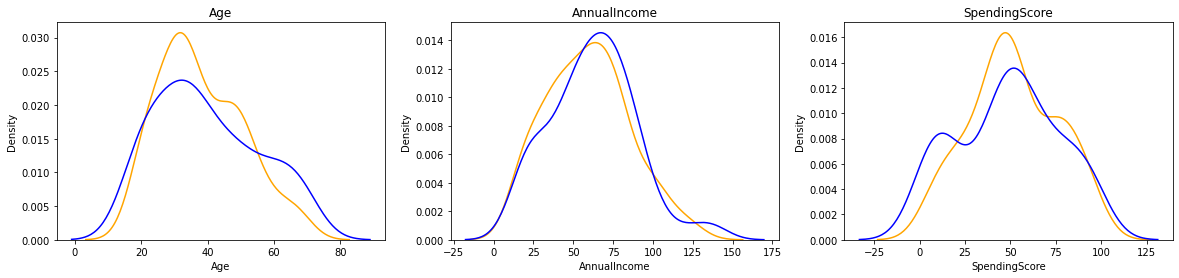

In [28]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.distplot(df.Age[df['Gender']=='Female'], color='orange', hist=False, kde=True, label='Female')
sns.distplot(df.Age[df['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('Age')

plt.subplot(1,3,2)
sns.distplot(df.AnnualIncome[df['Gender']=='Female'], color='orange', hist=False, kde=True, label='Female')
sns.distplot(df.AnnualIncome[df['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('AnnualIncome')

plt.subplot(1,3,3)
sns.distplot(df.SpendingScore[df['Gender']=='Female'], color='orange', hist=False, kde=True, label='Female')
sns.distplot(df.SpendingScore[df['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('SpendingScore')

plt.show()

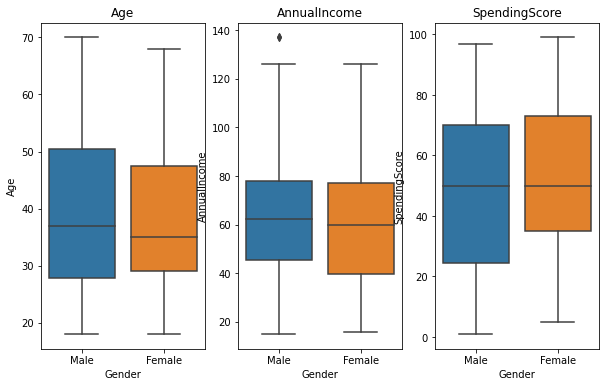

In [40]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
sns.boxplot(x=df.Gender, y=df.Age)
plt.title('Age')

plt.subplot(1,3,2)
sns.boxplot(x=df.Gender, y=df.AnnualIncome)
plt.title('AnnualIncome')

plt.subplot(1,3,3)
sns.boxplot(x=df.Gender, y=df.SpendingScore)
plt.title('SpendingScore')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

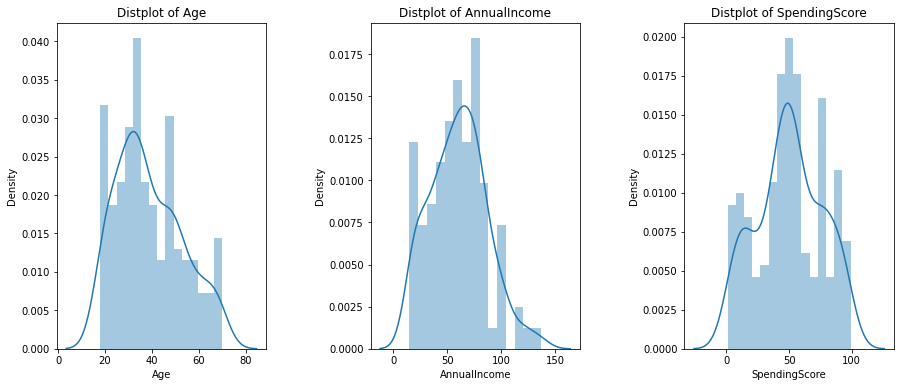

In [30]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'AnnualIncome' , 'SpendingScore']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

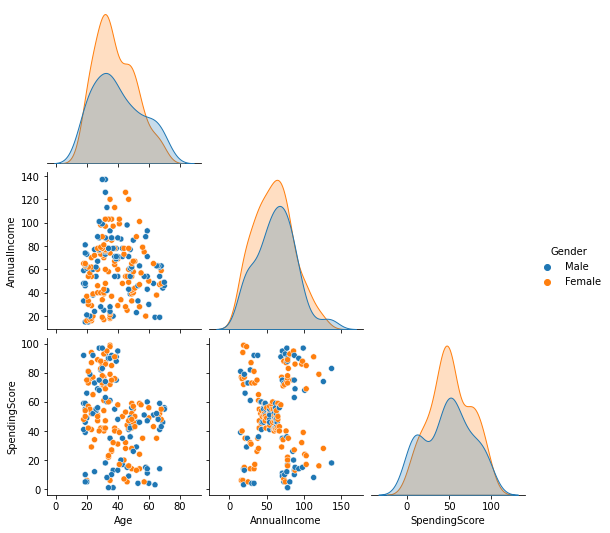

In [62]:
sns.pairplot(df, corner=True, vars = ['Age', 'AnnualIncome', 'SpendingScore'], hue = "Gender")

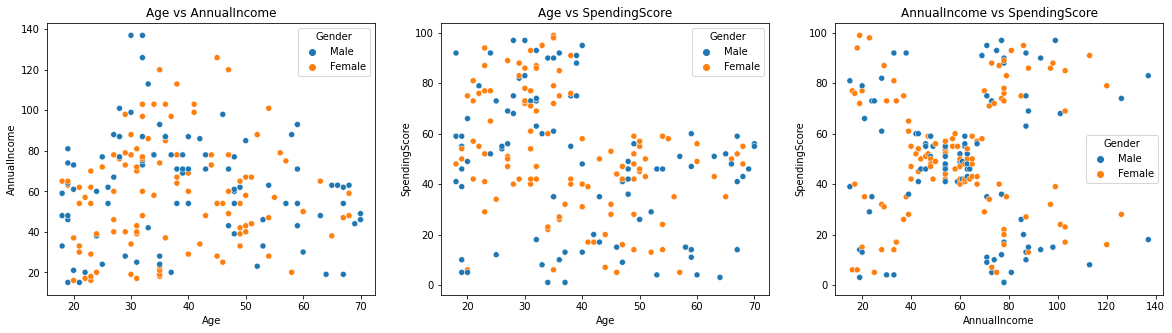

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df.Age, y=df.AnnualIncome, hue=df.Gender)
plt.title('Age vs AnnualIncome')

plt.subplot(1,3,2)
sns.scatterplot(x=df.Age, y=df.SpendingScore, hue=df.Gender)
plt.title('Age vs SpendingScore')

plt.subplot(1,3,3)
sns.scatterplot(x=df.AnnualIncome, y=df.SpendingScore, hue=df.Gender)
plt.title('AnnualIncome vs SpendingScore')

plt.show()

Have you found something?
I did actually... you can see there seems to be 2 groups of customers by age vs score (top left quarter vs bottom right quarter), where diagonal is delimiting them.

What is more important is actually chart Income vs Score where we can see 5 different groups of customers (corners & center). What does it mean? We've probably found ideal way to cluster our customers based on income and score!


In [70]:

dff = df.drop('Gender', axis=1)

In [75]:
# scale, because clearly these are not on the same scale, and I want to ensure each variable has equal weight
sc = StandardScaler()
xs = sc.fit_transform(dff)
dff = pd.DataFrame(xs, index=dff.index, columns=dff.columns)

In [89]:
# Kmeans
KS = range(2, 10)

# storage
inertia = []
silo = []

for k in KS:
  km = KMeans(k)
  km.fit(dff)
  labs = km.predict(dff)
  inertia.append(km.inertia_)
  silo.append(silhouette_score(dff, labs))
  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


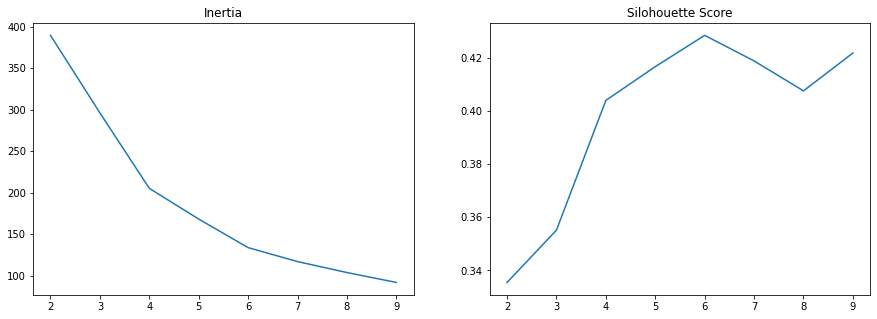

In [90]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.title("Inertia")
sns.lineplot(KS, inertia)

plt.subplot(1, 2, 2)
plt.title("Silohouette Score")
sns.lineplot(KS, silo)

plt.show()

In [91]:
for i, s in enumerate(silo[:10]):
  print(i+2,s) # +2 to align num clusters with value

2 0.33547192894004574
3 0.35514334720253254
4 0.4039582785148566
5 0.41664341513732767
6 0.4284167762892593
7 0.4188056949620008
8 0.40753744446458967
9 0.4217679716270013


In [93]:
# get the model
k6 = KMeans(6)
k6_labs = k6.fit_predict(X)

# metrics
k6_silo = silhouette_score(X, k6_labs)
k6_ssamps = silhouette_samples(X, k6_labs)
np.unique(k6_labs)

array([0, 1, 2, 3, 4, 5], dtype=int32)